DATA ANALYSIS

Problem statement : customer segmentation - "segment customers based on purchasing behaviour to improve targeting"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shopping_trends OG.csv to shopping_trends OG.csv


Import data

In [ ]:
import pandas as pd
df = pd.read_csv('shopping_trends OG.csv')
df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Season,Review Rating,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases
0,2471,55,Male,Blouse,Clothing,72,Fall,2.7,Next Day Air,No,No,29,Fortnightly
1,174,25,Male,Hat,Accessories,46,Fall,3.4,Standard,Yes,Yes,30,Annually
2,1230,34,Male,Jewelry,Accessories,52,Winter,3.6,Express,Yes,Yes,39,Annually
3,2141,53,Male,Handbag,Accessories,90,Fall,3.7,Standard,No,No,36,Fortnightly
4,1200,49,Male,Sandals,Footwear,89,Fall,4.5,Free Shipping,Yes,Yes,3,Weekly


In [ ]:
print(df.info)

<bound method DataFrame.info of      Customer ID  Age  Gender Item Purchased     Category  \
0           2471   55    Male         Blouse     Clothing   
1            174   25    Male            Hat  Accessories   
2           1230   34    Male        Jewelry  Accessories   
3           2141   53    Male        Handbag  Accessories   
4           1200   49    Male        Sandals     Footwear   
..           ...  ...     ...            ...          ...   
995         3374   70  Female        Sandals     Footwear   
996         3250   26  Female       Backpack  Accessories   
997         3180   57  Female         Shorts     Clothing   
998         2836   33  Female        T-shirt     Clothing   
999         2790   28  Female        Sweater     Clothing   

     Purchase Amount (USD)  Season  Review Rating  Shipping Type  \
0                       72    Fall            2.7   Next Day Air   
1                       46    Fall            3.4       Standard   
2                       52  Win

Data cleanaing

In [ ]:
print(df.isnull().sum()) #to find the null values

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Season                    0
Review Rating             0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Frequency of Purchases    0
dtype: int64


EDA

In [ ]:
#Accessing rows by integer index
print(df.iloc[0])

Customer ID                       2471
Age                                 55
Gender                            Male
Item Purchased                  Blouse
Category                      Clothing
Purchase Amount (USD)               72
Season                            Fall
Review Rating                      2.7
Shipping Type             Next Day Air
Discount Applied                     0
Promo Code Used                      0
Previous Purchases                  29
Frequency of Purchases     Fortnightly
Spender Category                Medium
Name: 0, dtype: object


In [ ]:
#Accessing by label index
print(df.loc[0])

Customer ID                       2471
Age                                 55
Gender                            Male
Item Purchased                  Blouse
Category                      Clothing
Purchase Amount (USD)               72
Season                            Fall
Review Rating                      2.7
Shipping Type             Next Day Air
Discount Applied                     0
Promo Code Used                      0
Previous Purchases                  29
Frequency of Purchases     Fortnightly
Spender Category                Medium
Name: 0, dtype: object


In [ ]:
#Slicing
print(df[0:3])

   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0         2471   55   Male         Blouse     Clothing                     72   
1          174   25   Male            Hat  Accessories                     46   
2         1230   34   Male        Jewelry  Accessories                     52   

   Season  Review Rating Shipping Type  Discount Applied  Promo Code Used  \
0    Fall            2.7  Next Day Air                 0                0   
1    Fall            3.4      Standard                 1                1   
2  Winter            3.6       Express                 1                1   

   Previous Purchases Frequency of Purchases Spender Category  
0                  29            Fortnightly           Medium  
1                  30               Annually              Low  
2                  39               Annually           Medium  


In [ ]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Verify duplicates are removed
print("Number of duplicate rows after removal:", df.duplicated().sum())

Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [ ]:
# Convert 'Discount Applied' and 'Promo Code Used' to binary values
df['Discount Applied'] = df['Discount Applied'].map({'Yes': 1, 'No': 0})
df['Promo Code Used'] = df['Promo Code Used'].map({'Yes': 1, 'No': 0})

# Verify the conversion
print(df[['Discount Applied', 'Promo Code Used']].head())

   Discount Applied  Promo Code Used
0                 0                0
1                 1                1
2                 1                1
3                 0                0
4                 1                1


In [ ]:
# Define spending ranges and labels
bins = [0, 50, 100, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create 'Spender Category' column
df['Spender Category'] = pd.cut(df['Purchase Amount (USD)'], bins=bins, labels=labels)

# Display the first few rows to confirm changes
print(df[['Purchase Amount (USD)', 'Spender Category']].head())

   Purchase Amount (USD) Spender Category
0                     72           Medium
1                     46              Low
2                     52           Medium
3                     90           Medium
4                     89           Medium


In [ ]:
print(df['Category'].value_counts())

Category
Clothing       434
Accessories    321
Footwear       151
Outerwear       94
Name: count, dtype: int64


In [ ]:
print(df.groupby('Discount Applied')['Purchase Amount (USD)'].mean())

Discount Applied
0    60.992701
1    59.184127
Name: Purchase Amount (USD), dtype: float64


In [ ]:
print(df['Spender Category'].value_counts())

Spender Category
Medium    614
Low       386
High        0
Name: count, dtype: int64


In [ ]:
print(df.groupby('Season')['Purchase Amount (USD)'].sum())

Season
Fall      16584
Spring    14112
Summer    15054
Winter    14673
Name: Purchase Amount (USD), dtype: int64


In [ ]:
# Display the first few rows after cleaning
print("Cleaned Data:")
print(df.head())


Cleaned Data:
   Customer ID  Age Gender Item Purchased     Category  Purchase Amount (USD)  \
0         2471   55   Male         Blouse     Clothing                     72   
1          174   25   Male            Hat  Accessories                     46   
2         1230   34   Male        Jewelry  Accessories                     52   
3         2141   53   Male        Handbag  Accessories                     90   
4         1200   49   Male        Sandals     Footwear                     89   

   Season  Review Rating  Shipping Type  Discount Applied  Promo Code Used  \
0    Fall            2.7   Next Day Air                 0                0   
1    Fall            3.4       Standard                 1                1   
2  Winter            3.6        Express                 1                1   
3    Fall            3.7       Standard                 0                0   
4    Fall            4.5  Free Shipping                 1                1   

   Previous Purchases Frequenc

Data visualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

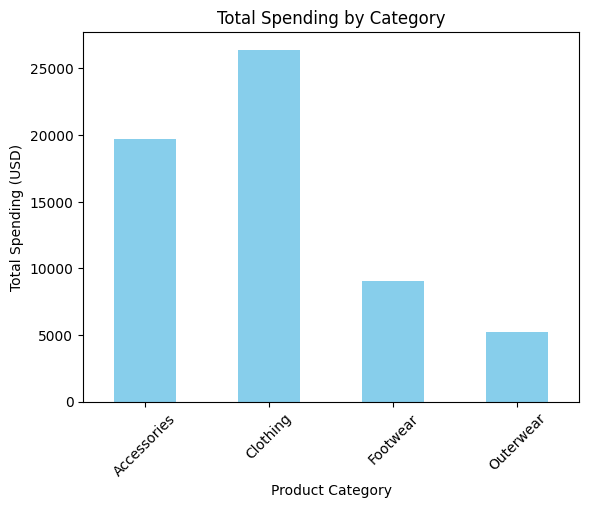

In [ ]:
# Calculate total spending for each category
category_spending = df.groupby('Category')['Purchase Amount (USD)'].sum()

# Create a bar chart
category_spending.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=45)
plt.show()

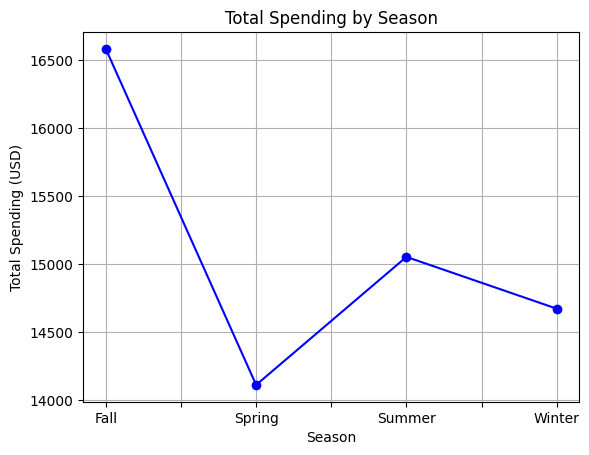

In [ ]:
# Calculate total spending by season
seasonal_spending = df.groupby('Season')['Purchase Amount (USD)'].sum()

# Create a line chart
seasonal_spending.plot(kind='line', marker='o', color='blue')
plt.title('Total Spending by Season')
plt.xlabel('Season')
plt.ylabel('Total Spending (USD)')
plt.grid(True)
plt.show()

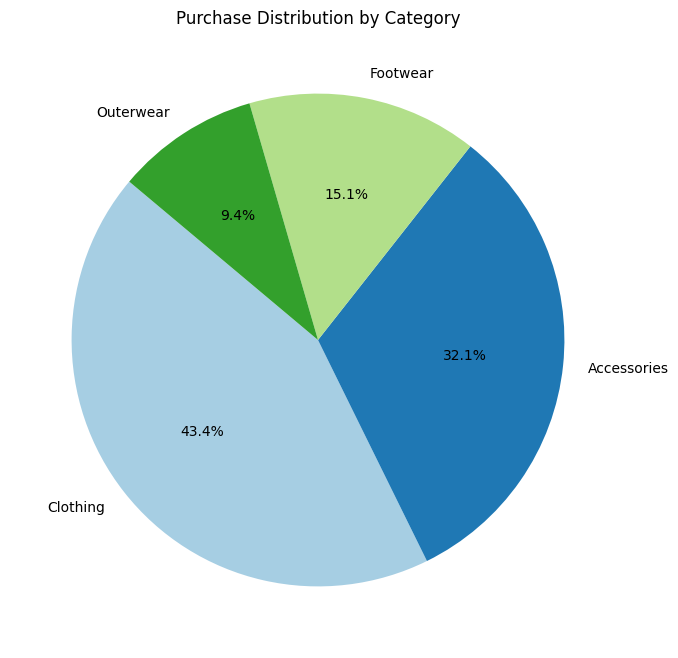

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for purchase distribution by category
category_purchase = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
category_purchase.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Purchase Distribution by Category')
plt.ylabel('')  # Hides the y-axis label
plt.show()

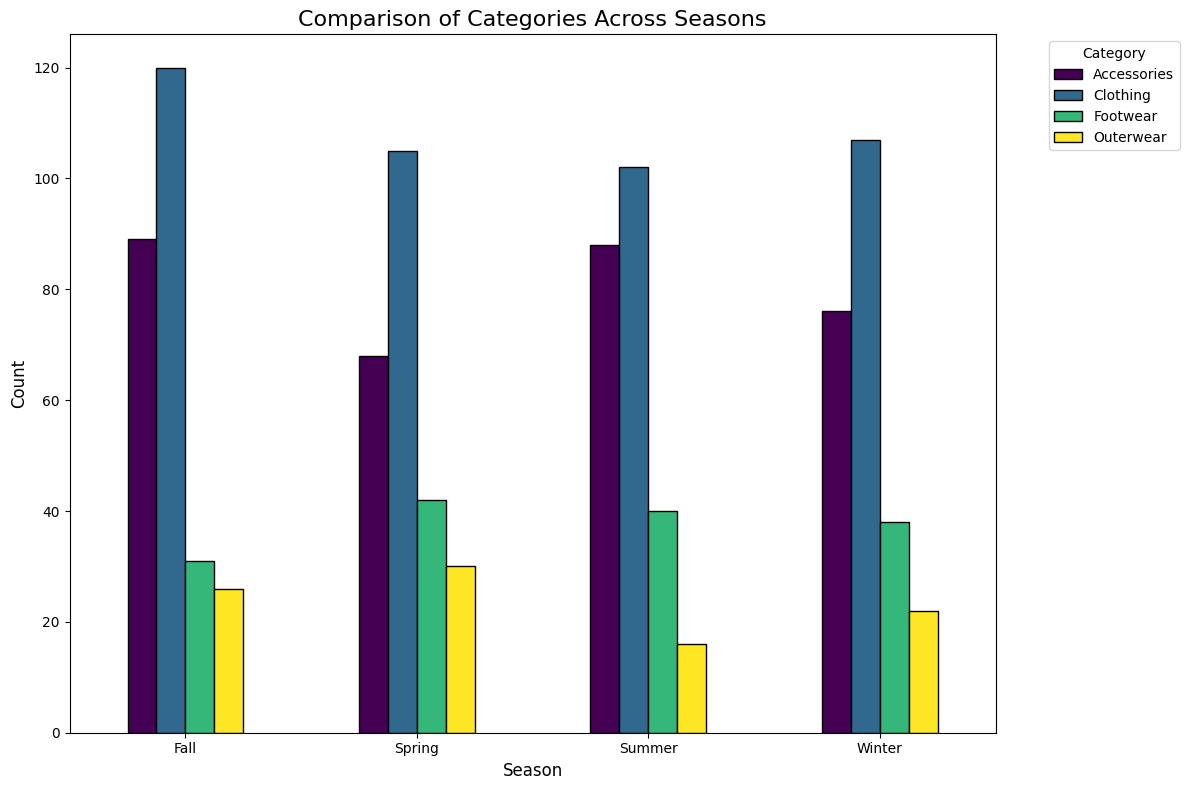

In [ ]:
# Group data by Season and Category
season_category_counts = df.groupby(['Season', 'Category']).size().unstack()

# Plot grouped bar chart
season_category_counts.plot(kind='bar', figsize=(12, 8), edgecolor='black', colormap='viridis')

# Customize the plot
plt.title('Comparison of Categories Across Seasons', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Season', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

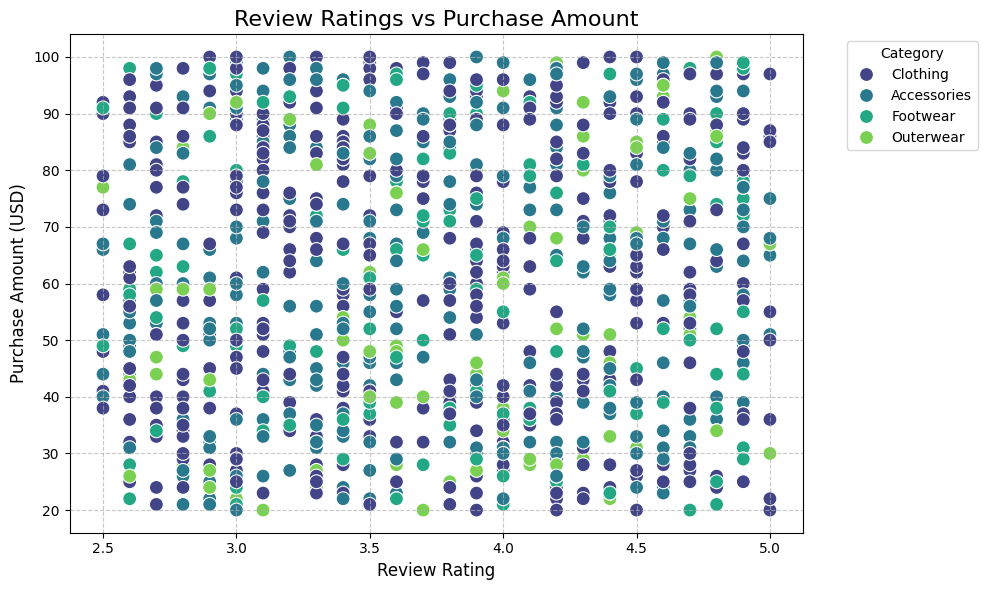

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Review Rating', y='Purchase Amount (USD)', hue='Category', palette='viridis', s=100)
plt.title('Review Ratings vs Purchase Amount', fontsize=16)
plt.xlabel('Review Rating', fontsize=12)
plt.ylabel('Purchase Amount (USD)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

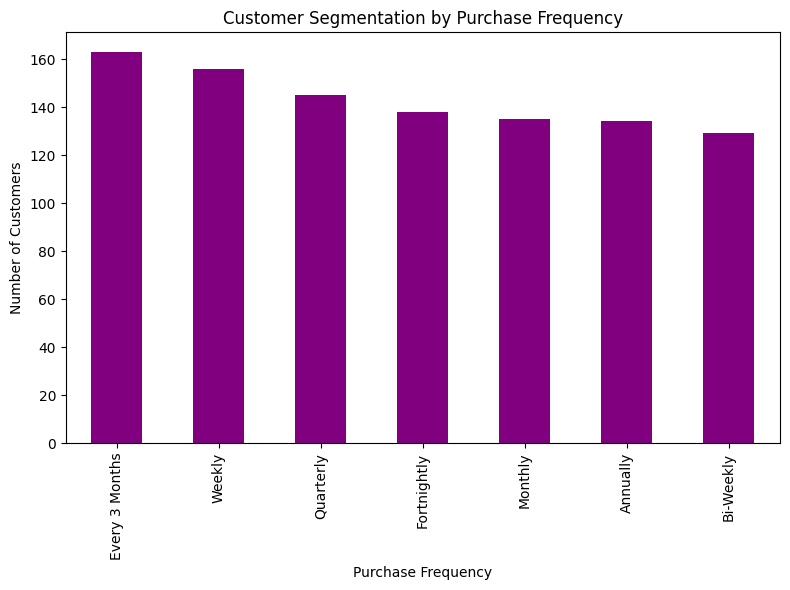

In [ ]:
# 5. Customer Segmentation by Purchase Frequency
plt.figure(figsize=(8, 6))
purchase_frequency = df['Frequency of Purchases'].value_counts()
purchase_frequency.plot(kind='bar', color='purple')
plt.title('Customer Segmentation by Purchase Frequency')
plt.ylabel('Number of Customers')
plt.xlabel('Purchase Frequency')
plt.tight_layout()
plt.show()

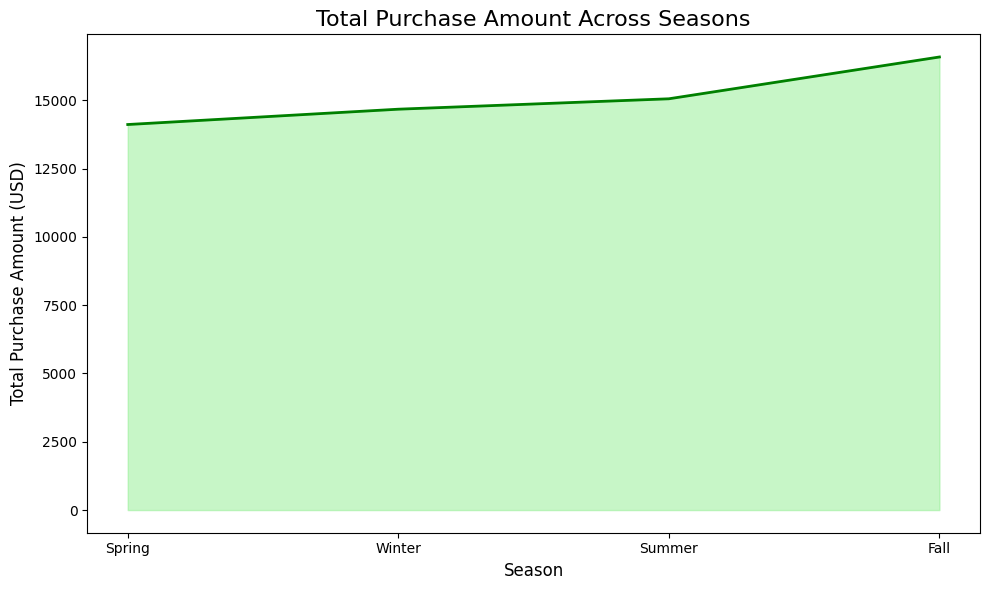

In [ ]:
# Aggregate data
season_purchase = df.groupby('Season')['Purchase Amount (USD)'].sum().sort_values()

# Create an area plot
plt.figure(figsize=(10, 6))
plt.fill_between(season_purchase.index, season_purchase.values, color='lightgreen', alpha=0.5)
plt.plot(season_purchase.index, season_purchase.values, color='green', linewidth=2)
plt.title('Total Purchase Amount Across Seasons', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Purchase Amount (USD)', fontsize=12)
plt.tight_layout()
plt.show()

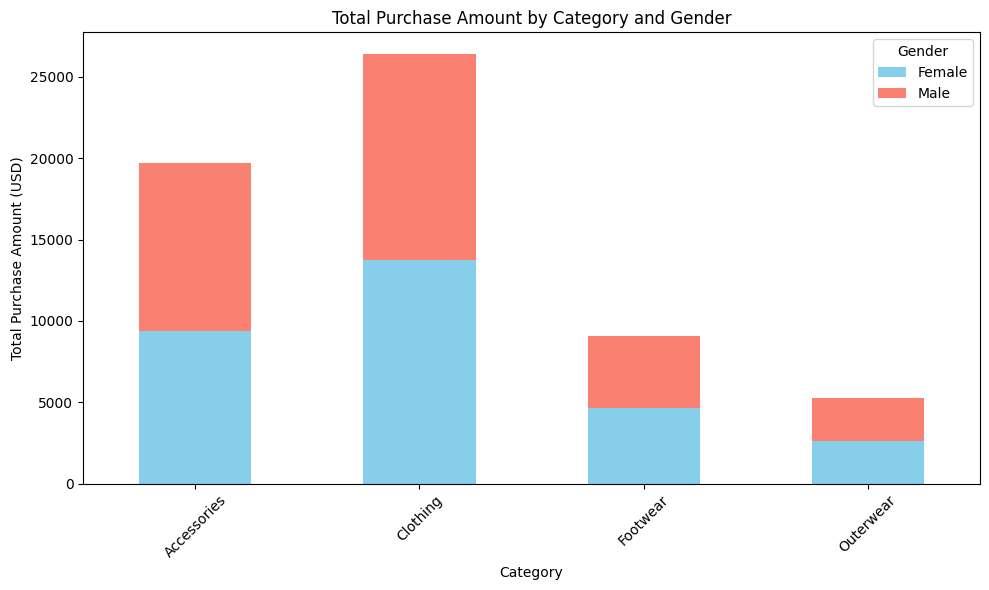

In [ ]:
# Aggregate data: Total purchase amount by Category and Gender
pivot_data = df.pivot_table(
    index='Category',
    columns='Gender',
    values='Purchase Amount (USD)',
    aggfunc='sum',
    fill_value=0
)

# Plot stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Add chart details
plt.title('Total Purchase Amount by Category and Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show plot
plt.show()

INSIGHTS

*  Higher spending in the holiday season indicates a need for seasonal promotions.
*  Younger customers (e.g., 20-35 years) tend to spend more frequently, particularly on categories like gadgets and fashion. Tailored offerings for this age group can increase engagement.
*  Gender-specific preferences are evident, with women spending more on clothing and accessories, while men prefer electronics.
*  Products with higher review ratings correlate with higher purchase amounts.

CONCLUSION

  Categories with low review ratings and low spending need attention. Improving quality and visibility in these segments can boost overall sales.








